<a href="https://colab.research.google.com/github/svetaepc/ds_py/blob/master/%22%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи классификации и кластеризации

Потапов Вячеслав:  


In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [ ]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [ ]:
wine = load_wine()

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [ ]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25, random_state=42)

In [ ]:
len(y_test)

45

In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [ ]:
result

,0,1
0,0,0
1,0,0
2,2,2
3,0,0
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,2,2


In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 2.77785654e+00, -2.62823777e-01,  6.34033699e+00,
        -9.23264800e-01,  1.12148061e-03, -1.73622434e+00,
         4.95743646e+00,  3.14554165e+00, -1.19253447e+00,
        -8.98034416e-01, -1.73258088e-01,  3.81064150e+00,
         1.36856107e-02],
       [-2.00764892e+00, -4.89578703e-01, -6.54854947e+00,
         4.49722072e-01,  4.06933168e-05, -7.56394603e-01,
         1.34633325e+00,  2.67670321e+00,  1.06737575e+00,
        -6.98689535e-01,  3.51943073e+00,  4.92874648e-01,
        -5.99014310e-03],
       [-4.39452636e-01,  1.04199771e+00,  1.89161928e+00,
         4.66343927e-01, -1.43060813e-03,  3.23563291e+00,
        -8.04119074e+00, -7.78525286e+00, -1.13872164e-01,
         2.12622388e+00, -4.96962424e+00, -5.38307173e+00,
        -7.90803569e-03]])

In [ ]:
# визуализируем дискриминантные линии только по 2 признакам
small_train = X_train[['ash', 'flavanoids']]
small_test = X_test[['ash', 'flavanoids']]

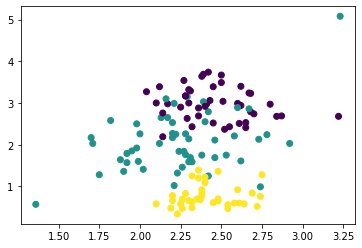

In [ ]:
plt.scatter(x=small_train['ash'], y=small_train['flavanoids'], c=y_train)
plt.show()

In [ ]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.45795455, 2.98522727],
       [2.24735849, 2.07150943],
       [2.41416667, 0.76888889]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


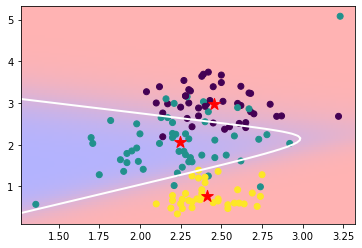

In [ ]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=y_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


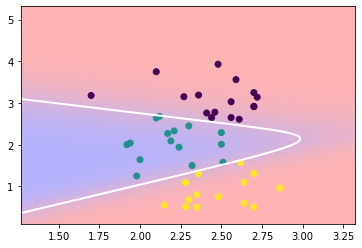

In [ ]:
# визуализация разделения на тесте
plt.scatter(small_test['ash'], small_test['flavanoids'], c=lda_small.predict(small_test))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

In [ ]:
# второй признак во много раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[-0.35930524,  3.52752381],
       [-1.82165655,  0.40785359],
       [ 3.1210341 , -4.9118691 ]])

In [ ]:
# какая будет точность?
accuracy_score(y_test, lda_small.predict(small_test))

0.8

In [ ]:
data[['flavanoids', 'ash']].corr()

,flavanoids,ash
flavanoids,1.000000,0.115077
ash,0.115077,1.000000


In [ ]:
# заменим модель на логистическую регрессиию
# кому интересно, отличия логистической регрессии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()

In [ ]:
lr.fit(small_train, y_train)

LogisticRegression()

In [ ]:
lr.predict(small_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1,
       2])

In [ ]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(small_test)

array([[7.56315717e-01, 2.42697431e-01, 9.86852178e-04],
       [5.42061819e-01, 4.52843490e-01, 5.09469115e-03],
       [8.53373614e-04, 3.62038881e-02, 9.62942738e-01],
       [8.58097850e-01, 1.41530850e-01, 3.71299934e-04],
       [1.20564684e-01, 8.51587157e-01, 2.78481588e-02],
       [8.33120043e-01, 1.66221700e-01, 6.58256678e-04],
       [6.43497819e-02, 8.28135786e-01, 1.07514432e-01],
       [3.35801055e-03, 1.21839544e-01, 8.74802446e-01],
       [7.55525954e-01, 2.42549226e-01, 1.92482047e-03],
       [9.97058289e-04, 7.36030133e-02, 9.25399928e-01],
       [5.86569969e-01, 4.05915005e-01, 7.51502572e-03],
       [1.00038895e-01, 5.55831728e-01, 3.44129377e-01],
       [4.32620704e-01, 5.64484610e-01, 2.89468530e-03],
       [2.29300956e-02, 6.69161853e-01, 3.07908052e-01],
       [7.51728984e-01, 2.46250167e-01, 2.02084982e-03],
       [2.61788671e-01, 7.21911814e-01, 1.62995145e-02],
       [2.45880961e-01, 6.79717516e-01, 7.44015224e-02],
       [9.48186628e-02, 6.14480

In [ ]:
accuracy_score(y_test, lr.predict(small_test))

0.8

In [ ]:
lr.coef_

array([[ 0.34145518,  2.46350785],
       [-1.24113815,  0.44535339],
       [ 0.89968298, -2.90886124]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


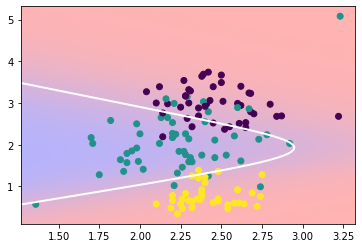

In [ ]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=y_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


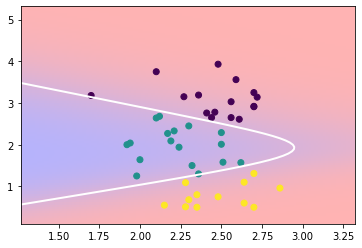

In [ ]:
plt.scatter(small_test['ash'], small_test['flavanoids'], c=lr.predict(small_test))

nx, ny = 200, 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

## Кластеризация

In [ ]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_blobs

In [ ]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [ ]:
X

array([[ 11.21896021,  -8.74255588],
       [  6.11312834,   4.28792292],
       [  4.06192183,   2.36235859],
       [  4.06633515, -10.5434506 ],
       [  7.73830994, -12.20052595],
       [  5.76760104,  -7.89725266],
       [  1.22256388,   8.61402951],
       [  3.83874759,   7.98569443],
       [  4.14161788, -11.07142535],
       [ -2.90707119,   4.77512561],
       [  0.91044429,   4.11298094],
       [  5.94177704,   6.58829902],
       [  0.27512183,  10.14719688],
       [  0.39901095,   8.00430882],
       [  3.62540839,   7.40354206],
       [  2.20437376,   9.09170366],
       [  9.37351447,  -6.40848814],
       [  1.31607216,   6.39073526],
       [  2.45353536,  -6.20933275],
       [  7.5647451 ,  -6.89871338],
       [  4.15511928,  11.90125458],
       [  2.68359541,   9.69149896],
       [  5.28166815,  -6.04439172],
       [  7.67594469, -11.77504172],
       [  3.39995755,  -8.20201772],
       [  2.20463666,  -6.54768869],
       [  6.10130964,  -9.88431943],
 

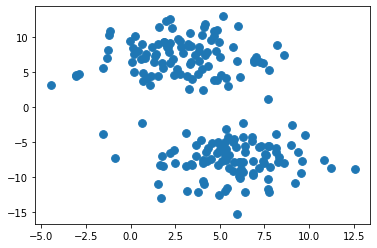

In [ ]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [ ]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [ ]:
v_1 = np.array(np.random.randint(0, 1000, 500))
v_2 = np.array(np.random.randint(0, 10, 500))

In [ ]:
print(v_1.max())
print(v_1.min())

print(v_2.max())
print(v_2.min())

996
0
9
0


In [ ]:
v_1_scaled = scaler.fit_transform(v_1.reshape(-1, 1))
v_1_scaled
v_2_scaled = scaler.fit_transform(v_2.reshape(-1, 1))
v_2_scaled

array([[-0.5049377 ],
       [-0.8522126 ],
       [-1.19948749],
       [ 0.53688699],
       [ 0.88416189],
       [ 0.18961209],
       [-0.5049377 ],
       [ 1.57871168],
       [-1.19948749],
       [-1.19948749],
       [-0.8522126 ],
       [-0.5049377 ],
       [-0.1576628 ],
       [ 0.18961209],
       [ 1.57871168],
       [ 1.57871168],
       [-0.5049377 ],
       [-0.8522126 ],
       [ 0.18961209],
       [ 1.23143678],
       [ 1.57871168],
       [-0.1576628 ],
       [ 1.23143678],
       [-1.54676239],
       [-0.8522126 ],
       [ 0.88416189],
       [ 1.23143678],
       [ 0.53688699],
       [-1.19948749],
       [ 1.23143678],
       [ 0.18961209],
       [ 0.88416189],
       [-0.1576628 ],
       [ 0.53688699],
       [ 0.88416189],
       [ 0.88416189],
       [-0.8522126 ],
       [-0.8522126 ],
       [ 0.53688699],
       [-0.1576628 ],
       [ 0.18961209],
       [-1.54676239],
       [-0.5049377 ],
       [-0.5049377 ],
       [ 1.23143678],
       [ 0

In [ ]:
print(v_1_scaled.max())
print(v_1_scaled.min())

print(v_2_scaled.max())
print(v_2_scaled.min())

1.8049130846654111
-1.654491504401063
1.5787116813665105
-1.5467623908505141


In [ ]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.381658  , -1.10202595],
       [ 0.62778526,  0.56463622],
       [-0.07681201,  0.31834709],
       [-0.07529602, -1.33236922],
       [ 1.18604134, -1.54431728],
       [ 0.50909531, -0.99390752],
       [-1.05214231,  1.11796648],
       [-0.15347322,  1.03759934],
       [-0.04943612, -1.39989978],
       [-2.47068773,  0.62695183],
       [-1.15935659,  0.54226028],
       [ 0.56892543,  0.85886561],
       [-1.37759227,  1.3140661 ],
       [-1.33503589,  1.03998021],
       [-0.22675605,  0.96313919],
       [-0.71488687,  1.17906334],
       [ 1.74774034, -0.80348723],
       [-1.02002186,  0.83359623],
       [-0.62929891, -0.77801428],
       [ 1.12642116, -0.86618944],
       [-0.04479833,  1.53841869],
       [-0.5502724 ,  1.2557801 ],
       [ 0.34217551, -0.75691751],
       [ 1.16461864, -1.48989576],
       [-0.30419927, -1.03288846],
       [-0.71479656, -0.82129166],
       [ 0.62372549, -1.24806311],
       [-1.22792827,  0.63958468],
       [ 0.01808775,

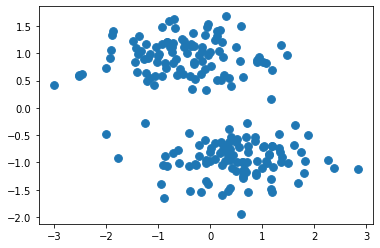

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=5)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 3, 3, 0, 2, 0, 1, 3, 0, 4, 1, 3, 1, 1, 3, 1, 2, 1, 0, 2, 3, 1,
       0, 2, 0, 0, 2, 1, 0, 3, 0, 2, 3, 3, 3, 2, 3, 2, 1, 3, 0, 1, 3, 1,
       2, 0, 2, 1, 2, 1, 0, 2, 3, 0, 0, 0, 0, 3, 1, 2, 0, 3, 1, 1, 2, 1,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 3, 1, 0, 0, 1, 3, 2, 4, 0, 4, 1, 1,
       3, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 3, 2, 1, 3, 0, 2, 1, 2,
       1, 2, 4, 2, 1, 2, 0, 1, 1, 0, 2, 0, 4, 4, 0, 3, 3, 3, 1, 0, 0, 4,
       0, 1, 3, 1, 0, 3, 4, 4, 3, 2, 3, 2, 1, 2, 1, 3, 1, 1, 3, 1, 1, 0,
       0, 0, 3, 2, 4, 0, 2, 2, 3, 3, 1, 0, 3, 0, 1, 0, 1, 1, 1, 2, 2, 0,
       1, 0, 2, 2, 3, 1, 0, 1, 2, 1, 4, 1, 3, 1, 2, 0, 4, 1, 2, 1, 0, 3,
       2, 1], dtype=int32)

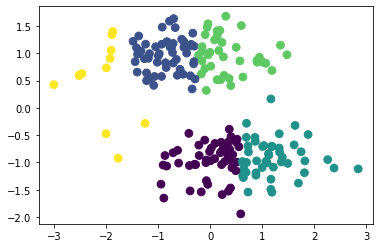

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)

In [ ]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

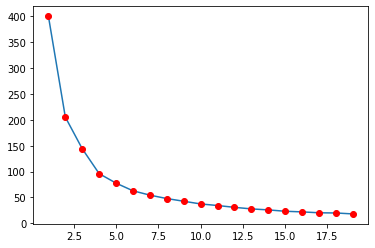

In [ ]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

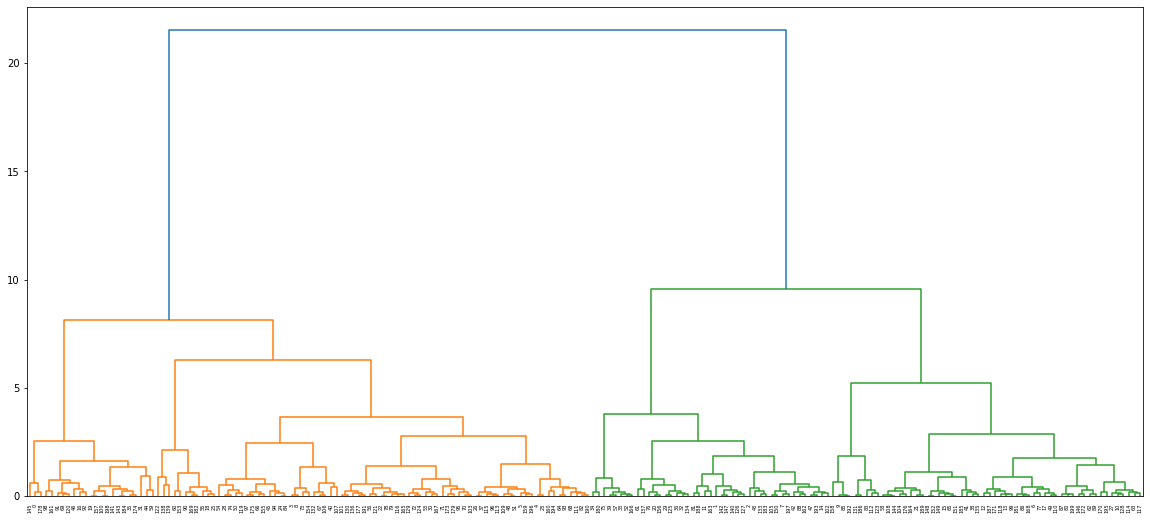

In [ ]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [ ]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [ ]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1,
       0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2,
       0, 1])

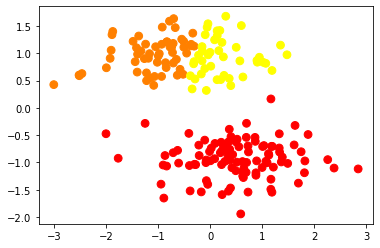

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [ ]:
df = pd.DataFrame(X)
df['y_hat'] = clusters
df

,0,1,y_hat
0,11.218960,-8.742556,0
1,6.113128,4.287923,2
2,4.061922,2.362359,2
3,4.066335,-10.543451,0
4,7.738310,-12.200526,0
...,...,...,...
195,0.189482,4.987147,1
196,5.713154,-9.124230,0
197,3.822667,8.631597,2
198,7.217426,-5.660128,0
